A **forest model art project** to help visualize the impacts of view angle, sun angle, and/or shadows on image brightness (whether in visible or infrared wavelengths) for remote sensing.


<img src="model.jpg" width="300" />

* The wooden "snow" base is about 14 cm square, painted white. 

* The "trees" are made of wooden pegs glued in place and painted dark green. 

* The trees protrude about 1 cm above the base.


<img src="animation_bw.gif" width="200" />

Black and while photos of the forest model from various angles.

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# open each image
img_0 = plt.imread('images/_0.jpg')
img_1 = plt.imread('images/_1.jpg')
img_2 = plt.imread('images/_2.jpg')
img_3 = plt.imread('images/_3.jpg')
img_4 = plt.imread('images/_4.jpg')
# make a list of the original images
images_original = [img_0, img_1, img_2, img_3, img_4]
# crop to a smaller area in the center
images = [img[55:135,45:125] for img in images_original]

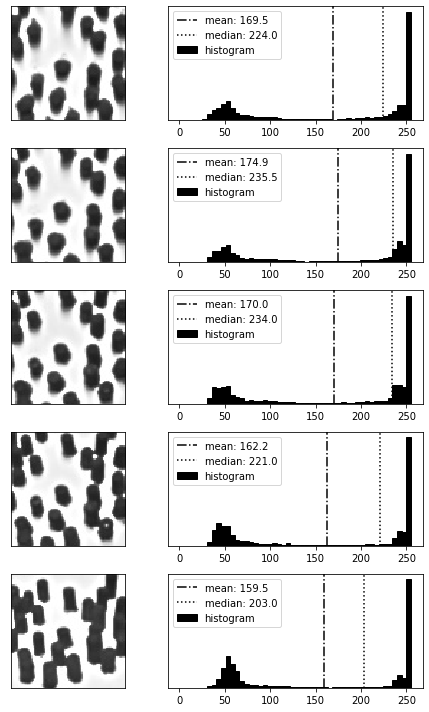

In [3]:
# plot all images and histograms
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(7,10), tight_layout=True)
for i, ax_row in enumerate(ax):
    # image plot
    ax_row[0].imshow(images[i])
    ax_row[0].get_xaxis().set_visible(False)
    ax_row[0].get_yaxis().set_visible(False)
    # histogram plot
    ax_row[1].hist(images[i].ravel(), bins=50, range=(0.0, 255), fc='k', ec='k', label='histogram');
    ax_row[1].axvline(images[i].ravel().mean(),c='k',ls='-.', label='mean: {}'.format(np.round(images[i].ravel().mean(),1)))
    ax_row[1].axvline(np.median(images[i].ravel()),c='k',ls=':', label='median: {}'.format(np.round(np.median(images[i].ravel()),1)))
    ax_row[1].legend(loc='upper left')
    ax_row[1].get_yaxis().set_visible(False)

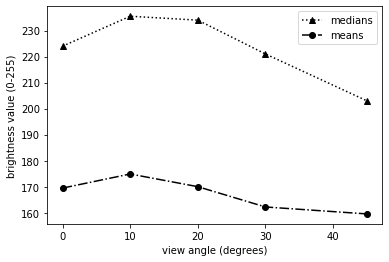

In [4]:
# approximate angles, mean, and median brightness values
angles = [0, 10, 20, 30, 45]
means = [np.mean(this_image.ravel()) for this_image in images]
medians = [np.median(this_image.ravel()) for this_image in images]

# plot mean and median value versus approximate view angle
plt.plot(angles,medians,':^k',label='medians')
plt.plot(angles,means,'-.ok',label='means')

plt.xlabel('view angle (degrees)')
plt.ylabel('brightness value (0-255)')

plt.legend();